In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir(r'C:\Users\rahul\Downloads\Part1_data.csv-20231125T080230Z-001')

In [8]:
df = pd.read_csv('Part1_data.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-10-2010,157.080002,157.440002,152.199997,153.710007,153.710007,8683400
1,04-10-2010,153.949997,155.960007,152.789993,155.389999,155.389999,5346500
2,05-10-2010,157.080002,161.210007,157.009995,160.869995,160.869995,5620000
3,06-10-2010,160.600006,160.679993,154.600006,155.399994,155.399994,6060800
4,07-10-2010,156.509995,157.399994,153.389999,156.270004,156.270004,4622000


In [10]:
df.loc[df['Close'].idxmax()]['Date']

'02-09-2020'

In [14]:
output = df[df['Close']>df['Open']]

In [15]:
len(output)

1260

In [17]:
df['Price Range']=df['High'] - df['Low']

In [20]:
round(df['Price Range'].min(),2)

1.34

In [21]:
df['Price Change%'] = df['Close'].pct_change()*100

In [24]:
sum(df['Price Change%']<0)

1166

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2517 non-null   object 
 1   Open           2517 non-null   float64
 2   High           2517 non-null   float64
 3   Low            2517 non-null   float64
 4   Close          2517 non-null   float64
 5   Adj Close      2517 non-null   float64
 6   Volume         2517 non-null   int64  
 7   Price Range    2517 non-null   float64
 8   Price Change%  2516 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 177.1+ KB


In [32]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%y')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2517 non-null   datetime64[ns]
 1   Open           2517 non-null   float64       
 2   High           2517 non-null   float64       
 3   Low            2517 non-null   float64       
 4   Close          2517 non-null   float64       
 5   Adj Close      2517 non-null   float64       
 6   Volume         2517 non-null   int64         
 7   Price Range    2517 non-null   float64       
 8   Price Change%  2516 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 177.1 KB


In [35]:
df['Year'] = df['Date'].dt.year

In [36]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Price Range,Price Change%,Year
0,2010-10-01,157.080002,157.440002,152.199997,153.710007,153.710007,8683400,5.240005,NaN,2010
1,2010-10-04,153.949997,155.960007,152.789993,155.389999,155.389999,5346500,3.170014,1.092962,2010
2,2010-10-05,157.080002,161.210007,157.009995,160.869995,160.869995,5620000,4.200012,3.526608,2010
3,2010-10-06,160.600006,160.679993,154.600006,155.399994,155.399994,6060800,6.079987,-3.400262,2010
4,2010-10-07,156.509995,157.399994,153.389999,156.270004,156.270004,4622000,4.009995,0.559852,2010
...,...,...,...,...,...,...,...,...,...,...
2512,2020-09-24,2977.790039,3069.300049,2965.000000,3019.790039,3019.790039,5529400,104.300049,0.664362,2020
2513,2020-09-25,3054.860107,3101.540039,2999.000000,3095.129883,3095.129883,4615200,102.540039,2.494870,2020
2514,2020-09-28,3148.850098,3175.040039,3117.169922,3174.050049,3174.050049,4224200,57.870117,2.549818,2020
2515,2020-09-29,3175.389893,3188.260010,3132.540039,3144.879883,3144.879883,3495800,55.719971,-0.919020,2020


In [39]:
output = df.groupby('Year')['Volume'].sum()
output.idxmax()

2011

In [40]:
output

Year
2010     367556600
2011    1459978600
2012    1049904100
2013     747905700
2014    1029066700
2015     957102000
2016    1038756300
2017     882705400
2018    1417897600
2019     974729400
2020     962941100
Name: Volume, dtype: int64

In [42]:
output =df.groupby('Year')['Close'].mean()

In [45]:
round(output.loc[2015],2)

478.14

In [46]:
df['Month'] = df['Date'].dt.month

In [49]:
df_2015=df[df['Date'].dt.year==2015]

In [51]:
output_2015 = df_2015.groupby('Month')['Close'].mean()

In [52]:
output_2015

Month
1     302.747501
2     375.745263
3     375.321361
4     394.212857
5     426.927501
6     432.599548
7     478.709095
8     518.464765
9     520.955718
10    566.743181
11    657.695499
12    669.262279
Name: Close, dtype: float64

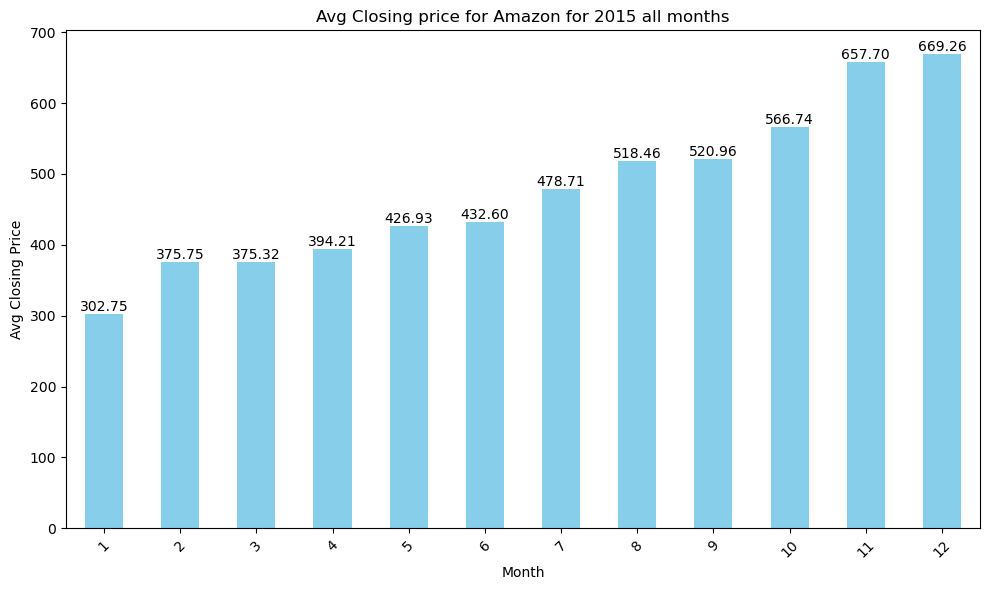

In [62]:
plt.figure(figsize=(10,6))
ax = output_2015.plot(kind='bar',color='skyblue')
plt.xlabel('Month')
plt.ylabel('Avg Closing Price')
plt.title('Avg Closing price for Amazon for 2015 all months')
plt.xticks(rotation=45)


for i, v in enumerate(output_2015):
    ax.text(i,v, f'{v:.2f}', ha='center', va='bottom',fontsize = 10)
plt.tight_layout()
plt.show()

In [66]:
df.groupby('Year')['Close'].std().idxmax()

2020

In [67]:
#pip install --upgrade mplfinance

In [69]:
import mplfinance as mpf
df.set_index('Date',inplace=True)

In [70]:
df

,Open,High,Low,Close,Adj Close,Volume,Price Range,Price Change%,Year,Month
Date,,,,,,,,,,
2010-10-01,157.080002,157.440002,152.199997,153.710007,153.710007,8683400,5.240005,NaN,2010,10
2010-10-04,153.949997,155.960007,152.789993,155.389999,155.389999,5346500,3.170014,1.092962,2010,10
2010-10-05,157.080002,161.210007,157.009995,160.869995,160.869995,5620000,4.200012,3.526608,2010,10
2010-10-06,160.600006,160.679993,154.600006,155.399994,155.399994,6060800,6.079987,-3.400262,2010,10
2010-10-07,156.509995,157.399994,153.389999,156.270004,156.270004,4622000,4.009995,0.559852,2010,10
...,...,...,...,...,...,...,...,...,...,...
2020-09-24,2977.790039,3069.300049,2965.000000,3019.790039,3019.790039,5529400,104.300049,0.664362,2020,9
2020-09-25,3054.860107,3101.540039,2999.000000,3095.129883,3095.129883,4615200,102.540039,2.494870,2020,9
2020-09-28,3148.850098,3175.040039,3117.169922,3174.050049,3174.050049,4224200,57.870117,2.549818,2020,9


In [71]:
start_date = '2019-01-01'
end_date = '2019-01-15'

df_subset = df[(df.index>=start_date) & (df.index<=end_date)]

In [72]:
df_subset

,Open,High,Low,Close,Adj Close,Volume,Price Range,Price Change%,Year,Month
Date,,,,,,,,,,
2019-01-02,1465.199951,1553.359985,1460.930054,1539.130005,1539.130005,7983100,92.429931,2.474086,2019,1
2019-01-03,1520.010010,1538.000000,1497.109985,1500.280029,1500.280029,6975600,40.890015,-2.524152,2019,1
2019-01-04,1530.000000,1594.000000,1518.310059,1575.390015,1575.390015,9182600,75.689941,5.006398,2019,1
2019-01-07,1602.310059,1634.560059,1589.189941,1629.510010,1629.510010,7993200,45.370118,3.435339,2019,1
2019-01-08,1664.689941,1676.609985,1616.609985,1656.579956,1656.579956,8881400,60.000000,1.661232,2019,1
2019-01-09,1652.979980,1667.800049,1641.400024,1659.420044,1659.420044,6348800,26.400025,0.171443,2019,1
2019-01-10,1641.010010,1663.250000,1621.619995,1656.219971,1656.219971,6507700,41.630005,-0.192843,2019,1
2019-01-11,1640.550049,1660.290039,1636.219971,1640.560059,1640.560059,4686200,24.070068,-0.945521,2019,1
2019-01-14,1615.000000,1648.199951,1595.150024,1617.209961,1617.209961,6005900,53.049927,-1.423300,2019,1


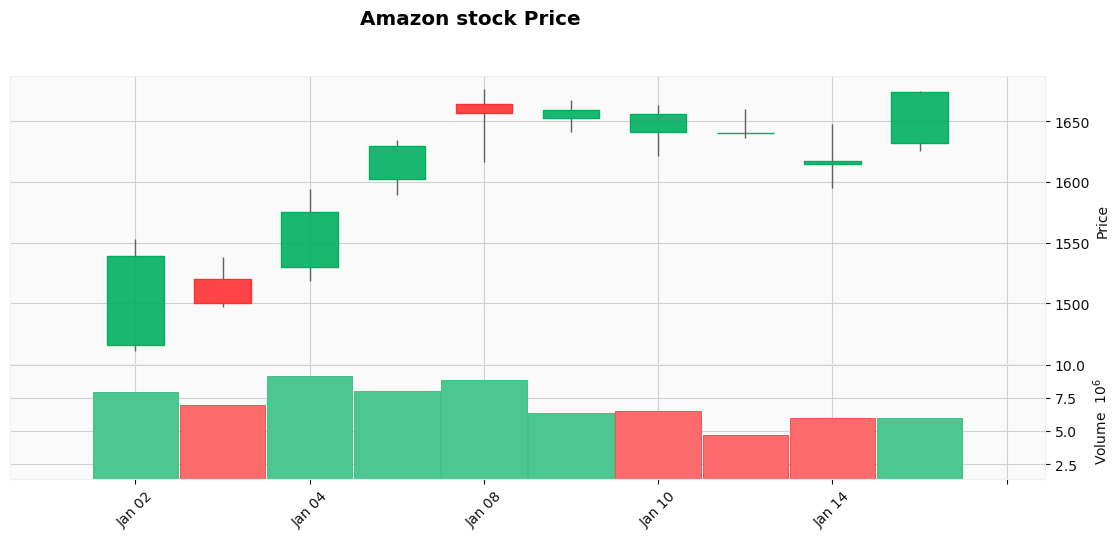

In [77]:
mpf.plot(df_subset, type='candle', title='Amazon stock Price', ylabel='Price', volume=True,
        style='yahoo', figratio=(20,8))

In [78]:
os.chdir(r'C:\Users\rahul\Downloads\Part2_data.csv-20231125T080230Z-001')

In [79]:
data = pd.read_csv('Part2_data.csv')

In [80]:
data.head()


,Date,Close_AAPL,Close_AMZN,Close_GOOG,Close_MRK,Close_UNH
0,01-10-2010,10.090000,153.710007,261.828613,36.599998,35.430000
1,04-10-2010,9.951428,155.389999,260.199707,36.520000,34.540001
2,05-10-2010,10.319285,160.869995,268.110046,37.020000,35.070000
3,06-10-2010,10.328215,155.399994,266.177307,37.009998,33.950001
4,07-10-2010,10.329286,156.270004,264.015411,36.709999,34.340000


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2517 non-null   object 
 1   Close_AAPL  2517 non-null   float64
 2   Close_AMZN  2517 non-null   float64
 3   Close_GOOG  2517 non-null   float64
 4   Close_MRK   2517 non-null   float64
 5   Close_UNH   2517 non-null   float64
dtypes: float64(5), object(1)
memory usage: 118.1+ KB


In [82]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2517 non-null   datetime64[ns]
 1   Close_AAPL  2517 non-null   float64       
 2   Close_AMZN  2517 non-null   float64       
 3   Close_GOOG  2517 non-null   float64       
 4   Close_MRK   2517 non-null   float64       
 5   Close_UNH   2517 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 118.1 KB


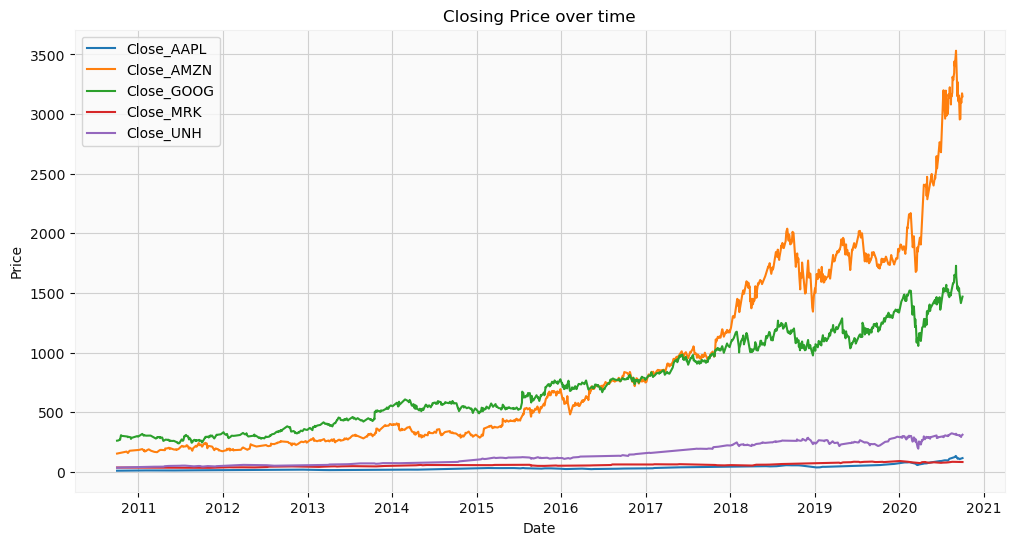

In [85]:
plt.figure(figsize=(12,6))
for col in ['Close_AAPL','Close_AMZN','Close_GOOG','Close_MRK','Close_UNH']:
    plt.plot(data['Date'], data[col], label=col)
    
plt.title('Closing Price over time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

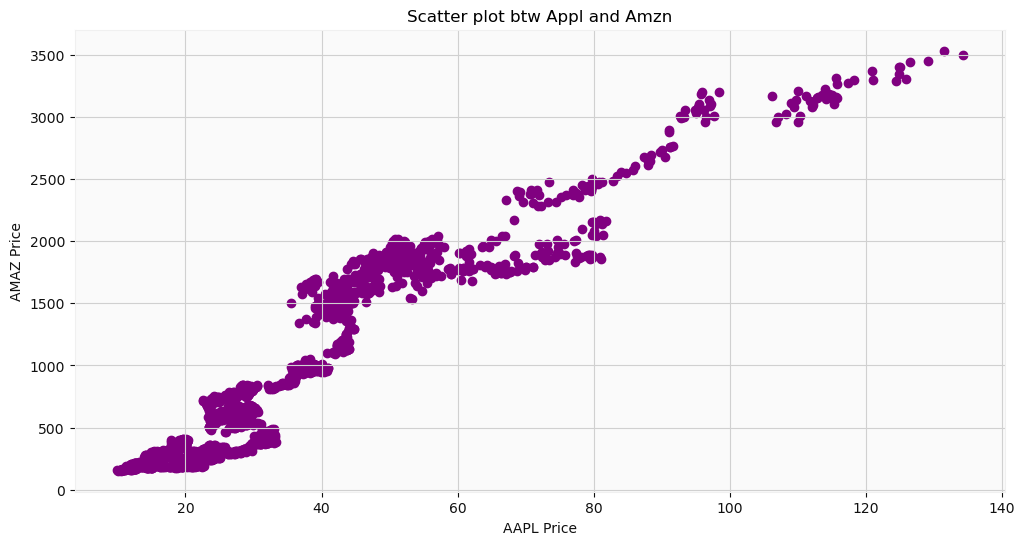

In [90]:
plt.figure(figsize=(12,6))
plt.scatter(data['Close_AAPL'],data['Close_AMZN'], color='purple',alpha=1)
plt.title('Scatter plot btw Appl and Amzn')
plt.xlabel('AAPL Price')
plt.ylabel('AMAZ Price')
plt.show()

In [91]:
corr_matrix = data[['Close_AAPL', 'Close_AMZN','Close_GOOG','Close_MRK','Close_UNH']].corr()

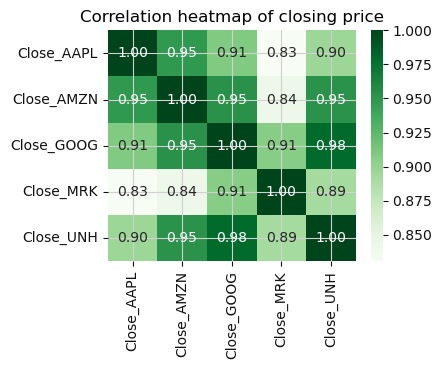

In [96]:
plt.figure(figsize=(4,3))
sns.heatmap(corr_matrix,annot=True,fmt='.2f',cmap='Greens')
plt.title('Correlation heatmap of closing price')
plt.show()

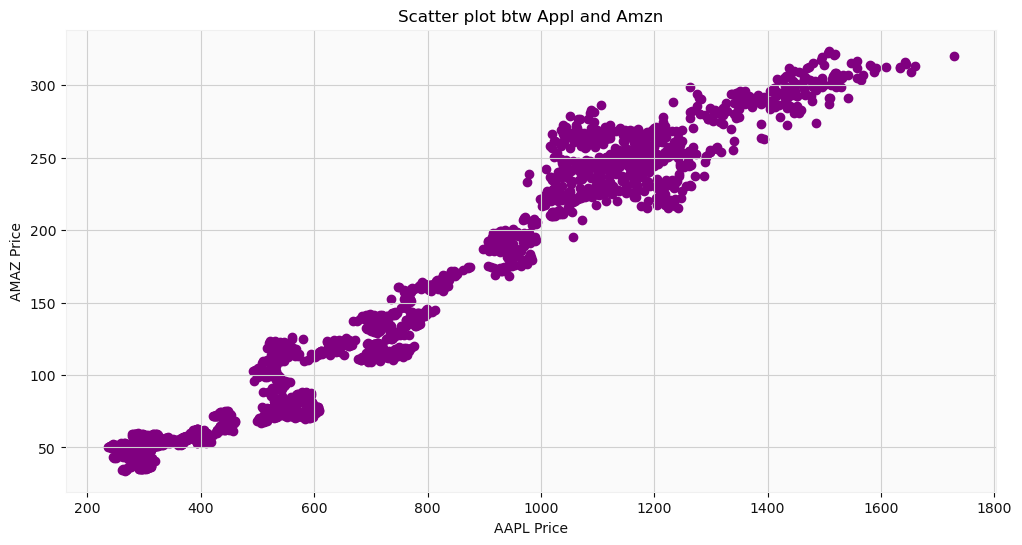

In [97]:
plt.figure(figsize=(12,6))
plt.scatter(data['Close_GOOG'],data['Close_UNH'], color='purple',alpha=1)
plt.title('Scatter plot btw Appl and Amzn')
plt.xlabel('AAPL Price')
plt.ylabel('AMAZ Price')
plt.show()